In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

Using TensorFlow backend.


In [3]:
print(train_data[0])
print(train_labels[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[0]

3

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results =np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [14]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
partial_y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 274us/step - loss: 2.5317 - acc: 0.4957 - val_loss: 1.7205 - val_acc: 0.6110
Epoch 2/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.4454 - acc: 0.6879 - val_loss: 1.3462 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 208us/step - loss: 1.0960 - acc: 0.7651 - val_loss: 1.1715 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 211us/step - loss: 0.8704 - acc: 0.8156 - val_loss: 1.0767 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.7041 - acc: 0.8474 - val_loss: 0.9855 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 2s 215us/step - loss: 0.5681 - acc: 0.8791 - val_loss: 0.9417 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 2s 224us/step - loss: 0.4603 - acc: 0.9035 - val_loss: 0.9102 - val_acc: 0.8010


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'val_loss', 'loss', 'val_acc'])

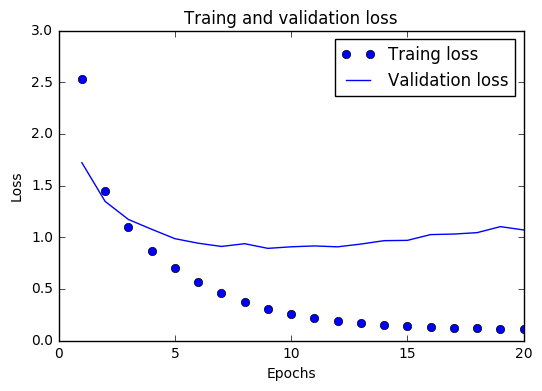

In [37]:
import matplotlib.pyplot as plt 

loss =  history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Traing loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

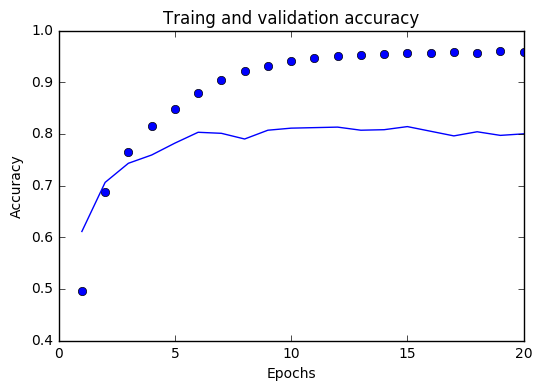

In [39]:
plt.clf()


acc = history.history['acc']
val_acc = history.history['val_acc']


plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Traing and validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.legend()

plt.show()

In [94]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 9,
                   batch_size = 512, 
                   validation_data = [x_val, y_val])

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 273us/step - loss: 2.6569 - acc: 0.5154 - val_loss: 1.7801 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 2s 226us/step - loss: 1.4248 - acc: 0.7130 - val_loss: 1.3293 - val_acc: 0.7040
Epoch 3/9
7982/7982 [==============================] - 2s 221us/step - loss: 1.0365 - acc: 0.7800 - val_loss: 1.1420 - val_acc: 0.7560
Epoch 4/9
7982/7982 [==============================] - 2s 208us/step - loss: 0.8160 - acc: 0.8250 - val_loss: 1.0413 - val_acc: 0.7810
Epoch 5/9
7982/7982 [==============================] - 2s 213us/step - loss: 0.6495 - acc: 0.8638 - val_loss: 0.9717 - val_acc: 0.8050
Epoch 6/9
7982/7982 [==============================] - 2s 209us/step - loss: 0.5202 - acc: 0.8919 - val_loss: 0.9483 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 2s 223us/step - loss: 0.4235 - acc: 0.9103 - val_loss: 0.9489 - val_acc: 0.8030
Epoch 8

In [95]:
results

[1.0123786646026856, 0.7809439002671416]

In [96]:
model.metrics_names

['loss', 'acc']

In [97]:
predictions = model.predict(x_test)
print(predictions[0].shape)
np.sum(predictions[0])

(46,)


1.0

将完全随机labels与原本的labels对比查看正确率，得到的结果约为17%，与模型预测的78%相比较，得出结论模型预测的结果不错

In [100]:
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1767586821015138